In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import utils
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from math import sqrt
import seaborn as sns; sns.set()
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [26]:
# load data
df = pd.read_csv('D:/vscode-projects/Python-projects/ML/hw2/student-mat.csv', delimiter=';', index_col='G3')  

# one-hot
df = pd.get_dummies(df, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
                                'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])


# numpy.ndarray
feature_names = df.columns.values
datas = df.values
datas = datas.astype('float64')
labels = df.index.values

# # standardization
# scaler = StandardScaler().fit(datas[:, :15])
# numeric_scaled = scaler.transform(datas[:, :15])
# datas[:, :15] = numeric_scaled


# shuffle
datas, labels = utils.shuffle(datas, labels)

#print(datas[:15])

# label transformation 
labels_2 = labels.copy()
labels_5 = labels.copy()
for i in range(labels.shape[0]):
    if labels[i]>=10:
        labels_2[i] = 1
    else:
        labels_2[i] = 0

    if labels[i]>=16:
        labels_5[i] = 1
    elif labels[i]>=14:
        labels_5[i] = 2
    elif labels[i]>=12:
        labels_5[i] = 3
    elif labels[i]>=10:
        labels_5[i] = 4
    else:
        labels_5[i] = 5

# print(labels)
# print(labels_2)
# print(labels_5)


In [27]:
def train_and_test(model, mat, precision, recall, accuracy, train_datas, train_labels, test_datas, test_labels): 
    model.fit(train_datas, train_labels)
    predicts = model.predict(test_datas)
    mat.append(confusion_matrix(test_labels, predicts))

    precision.append(metrics.precision_score(test_labels, predicts, average=None))
    recall.append(metrics.recall_score(test_labels, predicts, average=None))
    accuracy.append(metrics.accuracy_score(test_labels, predicts))
def plot_confusion_matrix(mat, title, xyticklabels, pos=None):
    if pos != None:
        plt.subplot(pos)
    sns.heatmap(mat.T, square=True, annot=True, fmt='.2f', cbar=False,
                xticklabels=xyticklabels, yticklabels=xyticklabels)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title(title)

def average_performance(precision, recall, accuracy, mat):
    precision = np.mean(precision, axis=0)
    recall = np.mean(recall, axis=0)
    accuracy = np.mean(accuracy, axis=0)
    mat = np.mean(mat, axis = 0)

    return precision, recall, accuracy, mat

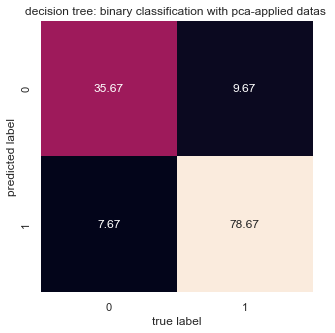

   Precision    Recall
0    0.78554  0.831644
1    0.91070  0.891602
accuracy      0.868378


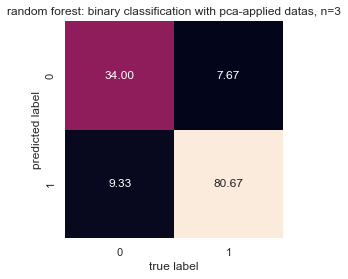

   Precision    Recall
0   0.820208  0.795457
1   0.897442  0.916245
accuracy      0.870884


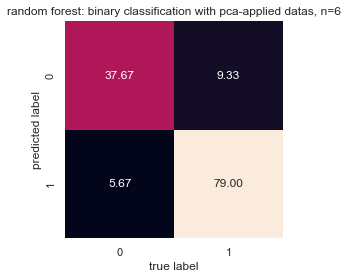

   Precision    Recall
0   0.798876  0.871863
1   0.932760  0.897091
accuracy      0.886036


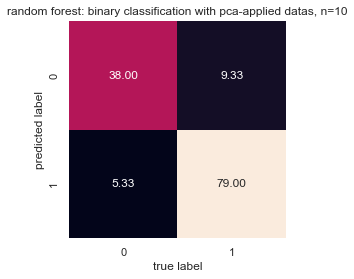

   Precision    Recall
0   0.803191  0.885150
1   0.936971  0.897091
accuracy      0.888600


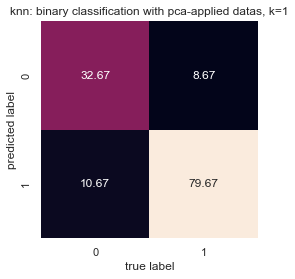

   Precision    Recall
0   0.789352  0.756079
1   0.880227  0.900971
accuracy      0.853169


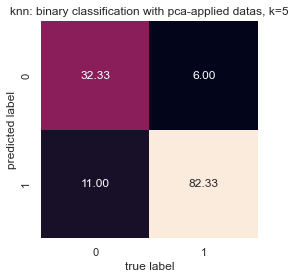

   Precision    Recall
0   0.841354  0.752497
1   0.881370  0.932860
accuracy      0.870865


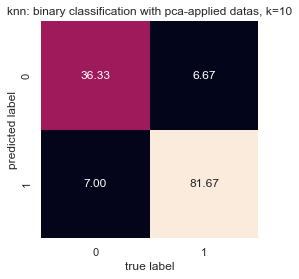

   Precision    Recall
0   0.843895  0.841965
1   0.919637  0.924344
accuracy      0.896175


In [28]:
kf = KFold(n_splits=3)

model = {'tree': tree.DecisionTreeClassifier(), 'forest3': RandomForestClassifier(n_estimators = 3, random_state = 0),
            'forest6': RandomForestClassifier(n_estimators = 6, random_state = 0), 
            'forest10': RandomForestClassifier(n_estimators = 10, random_state = 0),
            'knn1': KNeighborsClassifier(n_neighbors=1), 'knn5': KNeighborsClassifier(n_neighbors=5), 'knn10': KNeighborsClassifier(n_neighbors=10)}
precision = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
recall = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
accuracy = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
mat = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}

# label_2 with pca
for train_index, test_index in kf.split(datas):
    train_datas, test_datas = datas[train_index], datas[test_index]
    train_labels, test_labels = labels_2[train_index], labels_2[test_index]


    pca = PCA(n_components=10)
    pca.fit(train_datas)                        # compute eigenvector and eigenvalue
    train_datas = pca.transform(train_datas)    # apply dimension reduction to train_datas
    test_datas = pca.transform(test_datas)      # apply dimension reduction to test_datas
    
    # print(pca.explained_variance_ratio_)
    

    for key in model.keys():

        train_and_test(model[key], mat[key], precision[key], recall[key], accuracy[key], train_datas, train_labels, test_datas, test_labels)


plt.figure(figsize=(5,5))
for key in model.keys():
    if key == 'tree':
        i = 2
        title = 'decision tree: binary classification with pca-applied datas '
        # continue
    elif key == 'forest3':
        i = 4
        title = 'random forest: binary classification with pca-applied datas, n=3'
        # continue
    elif key == 'forest6':
        i = 5
        title = 'random forest: binary classification with pca-applied datas, n=6'
        # continue
    elif key == 'forest10':
        i = 6
        title = 'random forest: binary classification with pca-applied datas, n=10'
        # continue
    elif key == 'knn1':
        i = 7
        title = 'knn: binary classification with pca-applied datas, k=1'
    elif key == 'knn5':
        i = 8
        title = 'knn: binary classification with pca-applied datas, k=5'
    elif key == 'knn10':
        i = 9
        title = 'knn: binary classification with pca-applied datas, k=10'

    precision[key], recall[key], accuracy[key], mat[key] = average_performance(precision[key], recall[key], accuracy[key], mat[key])

    # pos = 330 + i
    plot_confusion_matrix(mat[key], title, [0,1])
    plt.show()


    
    table = pd.DataFrame( [[precision[key][0], recall[key][0]],[precision[key][1], recall[key][1]]], 
        index=[0, 1],
        columns=['Precision', 'Recall'])
    print(table)
    print('accuracy      {:.6f}'.format(accuracy[key]))

    #print(precision[key], recall[key], accuracy[key])

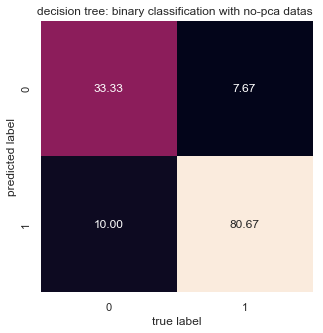

   Precision    Recall
0   0.808844  0.770466
1   0.889836  0.914976
accuracy      0.865853


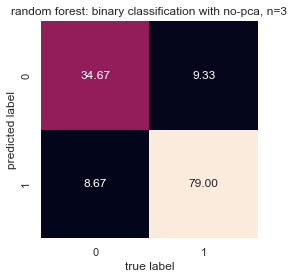

   Precision    Recall
0   0.790388  0.810294
1   0.902109  0.897091
accuracy      0.863309


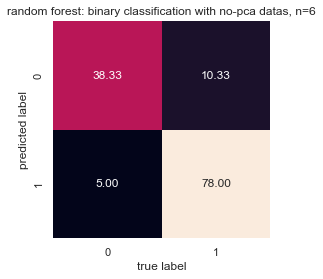

   Precision    Recall
0   0.785879  0.890990
1   0.939742  0.885183
accuracy      0.883607


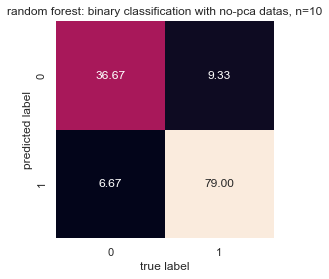

   Precision    Recall
0   0.792298  0.847580
1   0.922020  0.895898
accuracy      0.878537


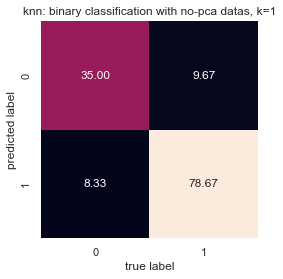

   Precision    Recall
0   0.781255  0.809360
1   0.903620  0.891448
accuracy      0.863270


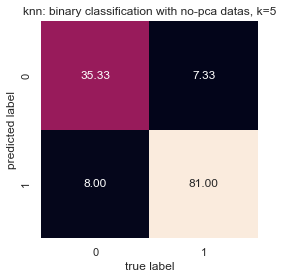

   Precision    Recall
0   0.824148  0.816099
1   0.909182  0.917848
accuracy      0.883491


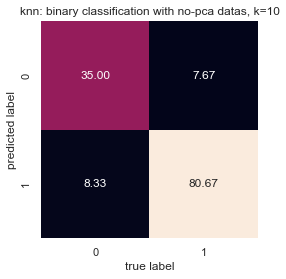

   Precision    Recall
0   0.819392  0.812068
1   0.904887  0.912956
accuracy      0.878460


In [29]:

kf = KFold(n_splits=3)

model = {'tree': tree.DecisionTreeClassifier(), 'forest3': RandomForestClassifier(n_estimators = 3, random_state = 0),
            'forest6': RandomForestClassifier(n_estimators = 6, random_state = 0), 
            'forest10': RandomForestClassifier(n_estimators = 10, random_state = 0),
            'knn1': KNeighborsClassifier(n_neighbors=1), 'knn5': KNeighborsClassifier(n_neighbors=5), 'knn10': KNeighborsClassifier(n_neighbors=10)}
precision = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
recall = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
accuracy = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
mat = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}

# label_2 without pca
for train_index, test_index in kf.split(datas):
    train_datas, test_datas = datas[train_index], datas[test_index]
    train_labels, test_labels = labels_2[train_index], labels_2[test_index]

    for key in model.keys():

        train_and_test(model[key], mat[key], precision[key], recall[key], accuracy[key], train_datas, train_labels, test_datas, test_labels)


plt.figure(figsize=(5,5))
for key in model.keys():
    if key == 'tree':
        i = 2
        title = 'decision tree: binary classification with no-pca datas '
        
    elif key == 'forest3':
        i = 4
        title = 'random forest: binary classification with no-pca, n=3'
    elif key == 'forest6':
        i = 5
        title = 'random forest: binary classification with no-pca datas, n=6'
    elif key == 'forest10':
        i = 6
        title = 'random forest: binary classification with no-pca datas, n=10'
    elif key == 'knn1':
        i = 7
        title = 'knn: binary classification with no-pca datas, k=1'
    elif key == 'knn5':
        i = 8
        title = 'knn: binary classification with no-pca datas, k=5'
    elif key == 'knn10':
        i = 9
        title = 'knn: binary classification with no-pca datas, k=10'

    precision[key], recall[key], accuracy[key], mat[key] = average_performance(precision[key], recall[key], accuracy[key], mat[key])

    # pos = 330 + i
    plot_confusion_matrix(mat[key], title, [0,1])
    plt.show()

    table = pd.DataFrame( [[precision[key][0], recall[key][0]],[precision[key][1], recall[key][1]]], 
        index=[0, 1],
        columns=['Precision', 'Recall'])
    print(table)
    print('accuracy      {:.6f}'.format(accuracy[key]))


    # print(precision[key], recall[key], accuracy[key])

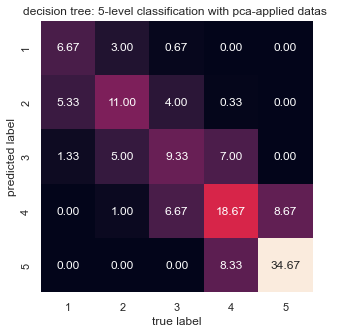

   Precision    Recall
1   0.660007  0.563477
2   0.540041  0.558462
3   0.401053  0.461718
4   0.542671  0.542413
5   0.807386  0.808711
accuracy      0.610089


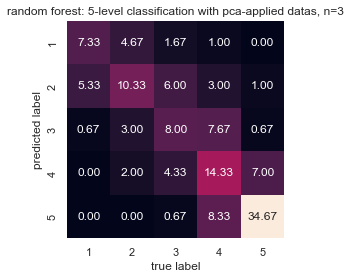

   Precision    Recall
1   0.505952  0.570016
2   0.396930  0.508998
3   0.397475  0.396709
4   0.523810  0.423536
5   0.796211  0.808486
accuracy      0.567025


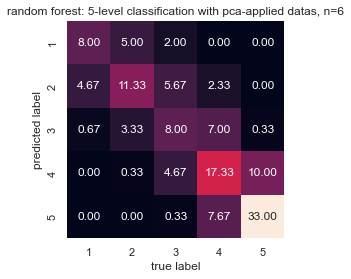

   Precision    Recall
1   0.528846  0.605104
2   0.456950  0.558089
3   0.412963  0.408147
4   0.544172  0.512843
5   0.810719  0.769367
accuracy      0.589791


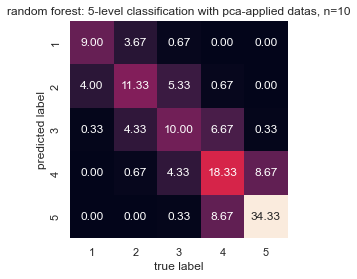

   Precision    Recall
1   0.658942  0.670494
2   0.523601  0.564942
3   0.463095  0.495448
4   0.581729  0.542115
5   0.796534  0.799489
accuracy      0.630291


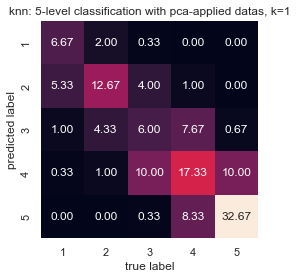

   Precision    Recall
1   0.712607  0.477831
2   0.536111  0.616457
3   0.308258  0.294234
4   0.456631  0.500896
5   0.789352  0.756079
accuracy      0.572153


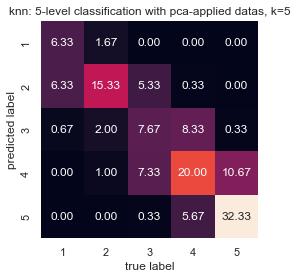

   Precision    Recall
1   0.780664  0.479107
2   0.555556  0.777809
3   0.422727  0.373366
4   0.520845  0.588411
5   0.841354  0.752497
accuracy      0.620171


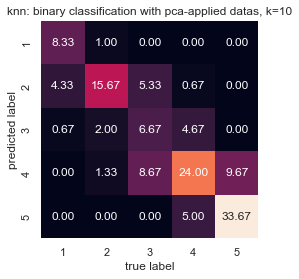

   Precision    Recall
1   0.866667  0.600159
2   0.607231  0.789324
3   0.465359  0.343137
4   0.549158  0.698029
5   0.867340  0.775622
accuracy      0.670830


In [30]:

kf = KFold(n_splits=3)

model = {'tree': tree.DecisionTreeClassifier(), 'forest3': RandomForestClassifier(n_estimators = 3, random_state = 0),
            'forest6': RandomForestClassifier(n_estimators = 6, random_state = 0), 
            'forest10': RandomForestClassifier(n_estimators = 10, random_state = 0),
            'knn1': KNeighborsClassifier(n_neighbors=1), 'knn5': KNeighborsClassifier(n_neighbors=5), 'knn10': KNeighborsClassifier(n_neighbors=10)}
precision = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
recall = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
accuracy = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
mat = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}

# label_5 with pca
for train_index, test_index in kf.split(datas):
    train_datas, test_datas = datas[train_index], datas[test_index]
    train_labels, test_labels = labels_5[train_index], labels_5[test_index]


    pca = PCA(n_components=10)
    pca.fit(train_datas)
    train_datas = pca.transform(train_datas)
    test_datas = pca.transform(test_datas)

    for key in model.keys():

        train_and_test(model[key], mat[key], precision[key], recall[key], accuracy[key], train_datas, train_labels, test_datas, test_labels)


plt.figure(figsize=(5,5))
for key in model.keys():
    if key == 'tree':
        i = 2
        title = 'decision tree: 5-level classification with pca-applied datas '
        
    elif key == 'forest3':
        i = 4
        title = 'random forest: 5-level classification with pca-applied datas, n=3'
    elif key == 'forest6':
        i = 5
        title = 'random forest: 5-level classification with pca-applied datas, n=6'
    elif key == 'forest10':
        i = 6
        title = 'random forest: 5-level classification with pca-applied datas, n=10'
    elif key == 'knn1':
        i = 7
        title = 'knn: 5-level classification with pca-applied datas, k=1'
    elif key == 'knn5':
        i = 8
        title = 'knn: 5-level classification with pca-applied datas, k=5'
    elif key == 'knn10':
        i = 9
        title = 'knn: binary classification with pca-applied datas, k=10'

    precision[key], recall[key], accuracy[key], mat[key] = average_performance(precision[key], recall[key], accuracy[key], mat[key])

    # pos = 330 + i
    plot_confusion_matrix(mat[key], title, [1,2,3,4,5])
    plt.show()

    table = pd.DataFrame( [[precision[key][0], recall[key][0]],[precision[key][1], recall[key][1]],
                [precision[key][2], recall[key][2]],[precision[key][3], recall[key][3]], [precision[key][4], recall[key][4]]],
        index=[1, 2, 3, 4, 5],
        columns=['Precision', 'Recall'])
    print(table)
    print('accuracy      {:.6f}'.format(accuracy[key]))


    # print(precision[key], recall[key], accuracy[key])

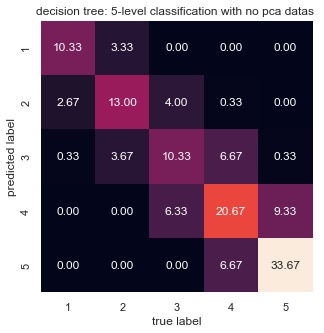

   Precision    Recall
1   0.759259  0.756459
2   0.646447  0.656224
3   0.496316  0.503852
4   0.582138  0.608423
5   0.835163  0.784653
accuracy      0.668324


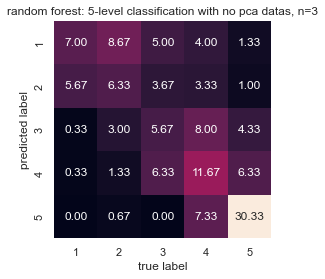

   Precision    Recall
1   0.287981  0.549442
2   0.320157  0.341725
3   0.268182  0.261438
4   0.450000  0.343489
5   0.791252  0.705506
accuracy      0.463181


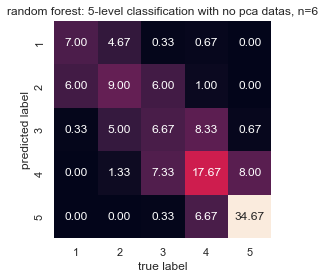

   Precision    Recall
1   0.557190  0.574960
2   0.419006  0.487133
3   0.338164  0.322246
4   0.518429  0.517622
5   0.832057  0.807811
accuracy      0.569570


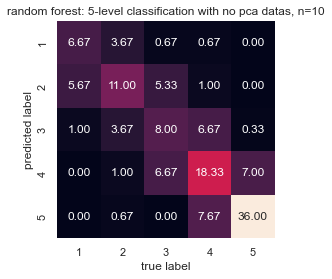

   Precision    Recall
1   0.595286  0.516108
2   0.478521  0.572587
3   0.433684  0.389239
4   0.554714  0.531661
5   0.810364  0.833193
accuracy      0.607526


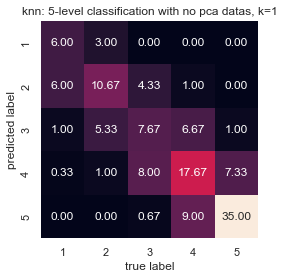

   Precision    Recall
1   0.657143  0.455502
2   0.455019  0.497716
3   0.340556  0.367414
4   0.515696  0.516129
5   0.781255  0.809360
accuracy      0.584779


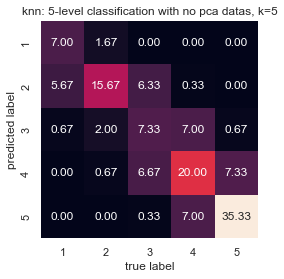

   Precision    Recall
1   0.768010  0.498405
2   0.553180  0.792960
3   0.417647  0.355742
4   0.577685  0.585424
5   0.824148  0.816099
accuracy      0.648026


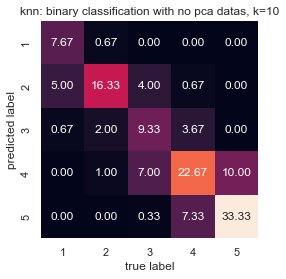

   Precision    Recall
1   0.902778  0.577831
2   0.621885  0.831935
3   0.594444  0.477124
4   0.564550  0.662485
5   0.809198  0.771365
accuracy      0.678425


In [31]:


kf = KFold(n_splits=3)

model = {'tree': tree.DecisionTreeClassifier(), 'forest3': RandomForestClassifier(n_estimators = 3, random_state = 0),
            'forest6': RandomForestClassifier(n_estimators = 6, random_state = 0), 
            'forest10': RandomForestClassifier(n_estimators = 10, random_state = 0),
            'knn1': KNeighborsClassifier(n_neighbors=1), 'knn5': KNeighborsClassifier(n_neighbors=5), 'knn10': KNeighborsClassifier(n_neighbors=10)}
precision = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
recall = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
accuracy = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}
mat = {'tree': [], 'forest3': [], 'forest6': [],'forest10': [],'knn1': [], 'knn5': [], 'knn10': []}

# label_5 with pca
for train_index, test_index in kf.split(datas):
    train_datas, test_datas = datas[train_index], datas[test_index]
    train_labels, test_labels = labels_5[train_index], labels_5[test_index]

    for key in model.keys():

        train_and_test(model[key], mat[key], precision[key], recall[key], accuracy[key], train_datas, train_labels, test_datas, test_labels)


plt.figure(figsize=(5,5))
for key in model.keys():
    if key == 'tree':
        i = 2
        title = 'decision tree: 5-level classification with no pca datas '
        
    elif key == 'forest3':
        i = 4
        title = 'random forest: 5-level classification with no pca datas, n=3'
    elif key == 'forest6':
        i = 5
        title = 'random forest: 5-level classification with no pca datas, n=6'
    elif key == 'forest10':
        i = 6
        title = 'random forest: 5-level classification with no pca datas, n=10'
    elif key == 'knn1':
        i = 7
        title = 'knn: 5-level classification with no pca datas, k=1'
    elif key == 'knn5':
        i = 8
        title = 'knn: 5-level classification with no pca datas, k=5'
    elif key == 'knn10':
        i = 9
        title = 'knn: binary classification with no pca datas, k=10'

    precision[key], recall[key], accuracy[key], mat[key] = average_performance(precision[key], recall[key], accuracy[key], mat[key])

    # pos = 330 + i
    plot_confusion_matrix(mat[key], title, [1,2,3,4,5])
    plt.show()

    table = pd.DataFrame( [[precision[key][0], recall[key][0]],[precision[key][1], recall[key][1]],
                [precision[key][2], recall[key][2]],[precision[key][3], recall[key][3]], [precision[key][4], recall[key][4]]],
        index=[1, 2, 3, 4, 5],
        columns=['Precision', 'Recall'])
    print(table)
    print('accuracy      {:.6f}'.format(accuracy[key]))

    # print(precision[key], recall[key], accuracy[key])

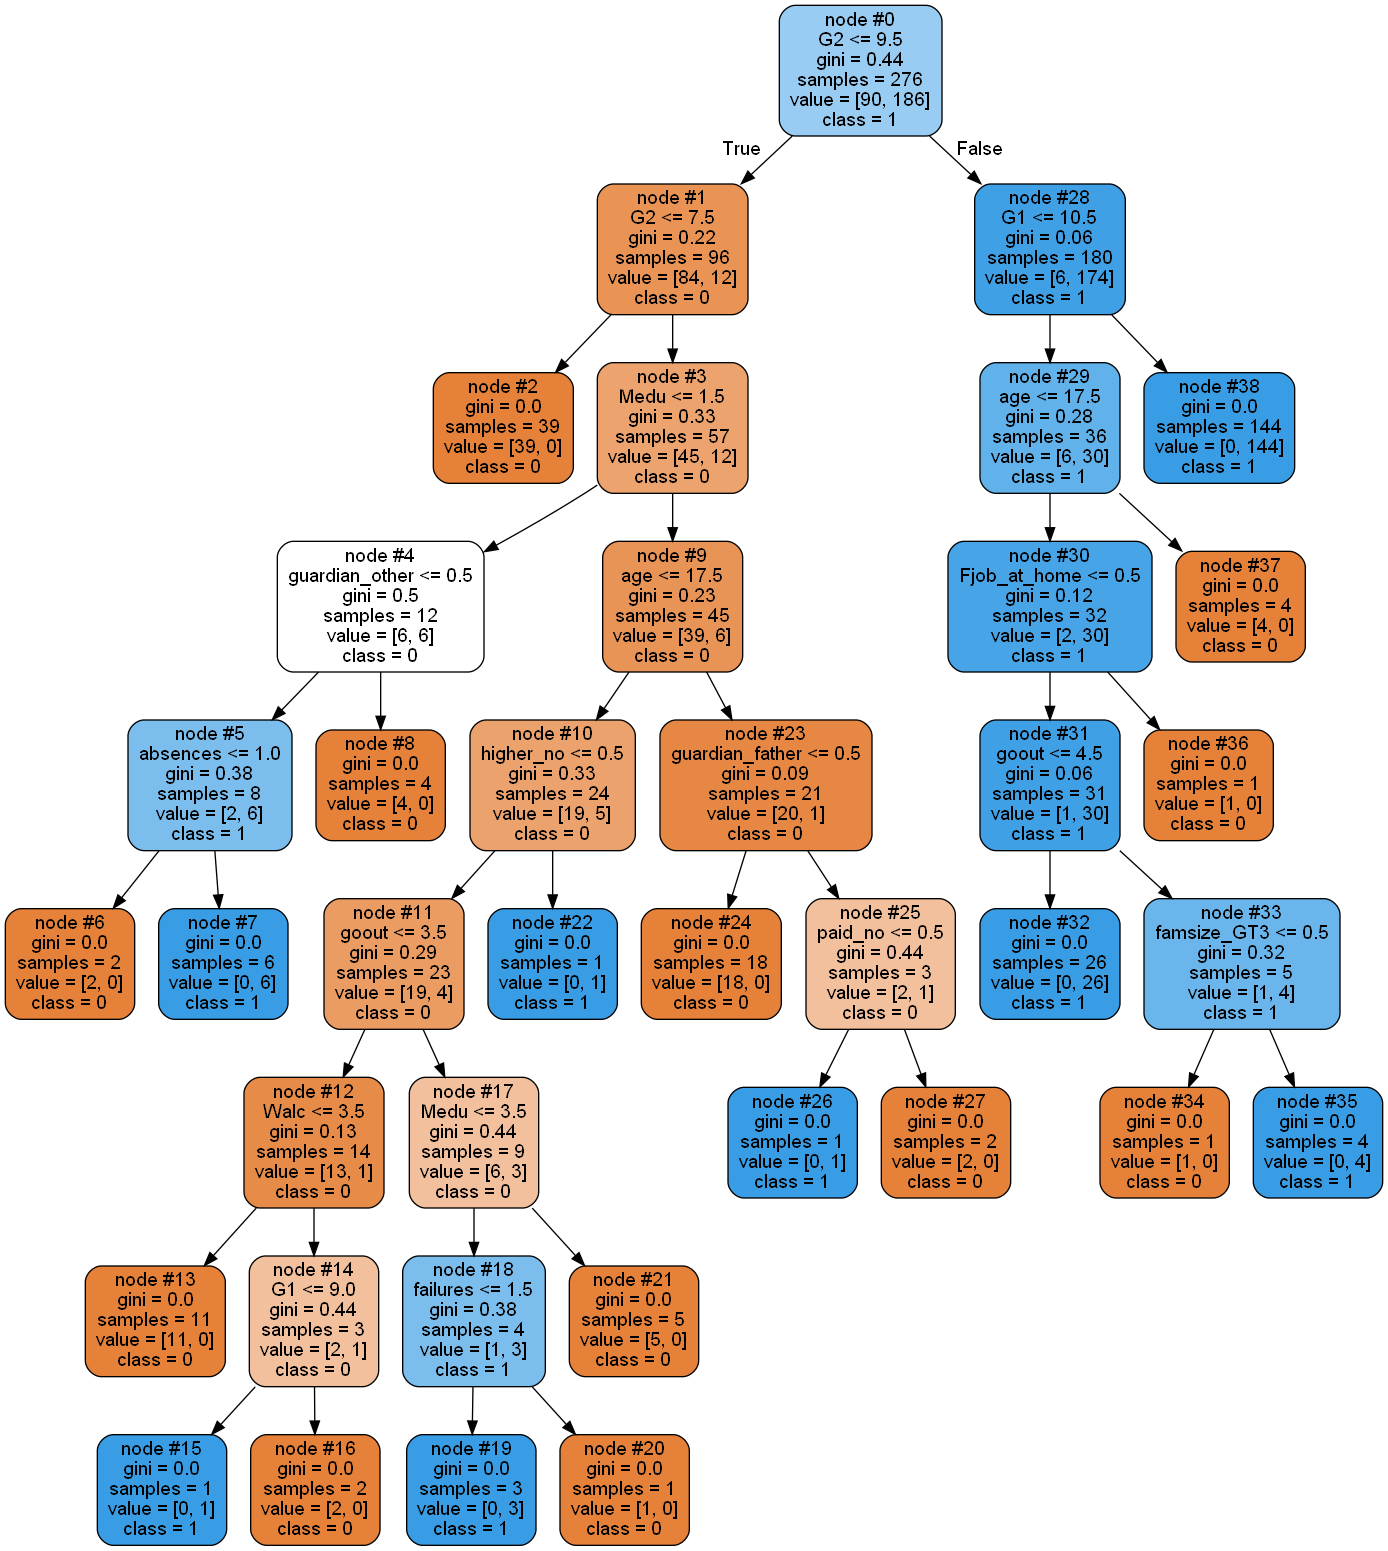

In [32]:
# Questions: decision tree
# Using the hold-out validation
# binary case

# train model
train_datas, test_datas, train_labels, test_labels = train_test_split(datas, labels_2, test_size=0.3, random_state=1)
model = tree.DecisionTreeClassifier()
model.fit(train_datas, train_labels)
predicts = model.predict(test_datas)

dot_data = tree.export_graphviz(model, 
                out_file = None, 
                feature_names = feature_names,
                class_names = ['0','1'], 
                rounded = True, proportion = False, 
                precision = 2, filled = True, node_ids = True)
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('D:/vscode-projects/Python-projects/ML/hw2/tree_graph.png')
Image(graph.create_png())  

In [33]:
n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold

node_indicator = model.decision_path(test_datas)
leaf_id = model.apply(test_datas)

sample_id = 0
print('Sample\'s feature values:')
for i in range(len(test_datas[0])):
    if i == len(test_datas[0]) - 1:
        print( feature_names[i], ':', test_datas[0][i], '\n')
    else:
        print( feature_names[i], ':', test_datas[0][i], end='; ')
# obtain ids of the nodes 'sample_id' goes through, i.e., row 'sample_id'
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print('Rules used to predict sample {id}:'.format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        print('arrived at decision node {node}'.format(node=node_id))
        continue

    # check if value of the split feature for sample 0 is below threshold
    if test_datas[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        'decision node {node} : (X_test[{sample}, {feature}] = {value}) '
        '{inequality} {threshold})'.format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=test_datas[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Sample's feature values:
age : 19.0; Medu : 1.0; Fedu : 2.0; traveltime : 1.0; studytime : 2.0; failures : 1.0; famrel : 4.0; freetime : 5.0; goout : 2.0; Dalc : 2.0; Walc : 2.0; health : 4.0; absences : 3.0; G1 : 13.0; G2 : 11.0; school_GP : 1.0; school_MS : 0.0; sex_F : 0.0; sex_M : 1.0; address_R : 0.0; address_U : 1.0; famsize_GT3 : 1.0; famsize_LE3 : 0.0; Pstatus_A : 0.0; Pstatus_T : 1.0; Mjob_at_home : 0.0; Mjob_health : 0.0; Mjob_other : 1.0; Mjob_services : 0.0; Mjob_teacher : 0.0; Fjob_at_home : 0.0; Fjob_health : 0.0; Fjob_other : 0.0; Fjob_services : 1.0; Fjob_teacher : 0.0; reason_course : 1.0; reason_home : 0.0; reason_other : 0.0; reason_reputation : 0.0; guardian_father : 0.0; guardian_mother : 0.0; guardian_other : 1.0; schoolsup_no : 1.0; schoolsup_yes : 0.0; famsup_no : 1.0; famsup_yes : 0.0; paid_no : 1.0; paid_yes : 0.0; activities_no : 1.0; activities_yes : 0.0; nursery_no : 1.0; nursery_yes : 0.0; higher_no : 0.0; higher_yes : 1.0; internet_no : 0.0; internet_yes 

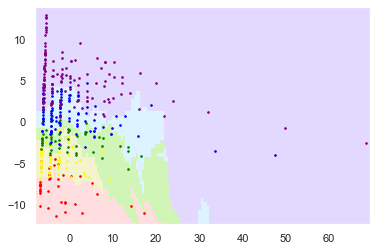

In [34]:
# Questions: KNN + PCA

# train the model
train_datas, test_datas, train_labels, test_labels = train_test_split(datas, labels_5, test_size=0.3, random_state=1)
pca = PCA(n_components=2)
pca.fit(train_datas)

train_datas = pca.transform(train_datas)
test_datas = pca.transform(test_datas)
all_datas = pca.transform(datas)

model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_datas, train_labels)



# Create color maps -> boundary color
cmap_light = ListedColormap(['#ffdee0', '#f3f3cd', '#d1f4b7', '#ddf3ff', '#e3d9ff'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min = all_datas[:, 0].min() - 1
x_max = all_datas[:, 0].max() + 1
y_min = all_datas[:, 1].min() - 1
y_max = all_datas[:, 1].max() + 1

# step size in the mesh
delta = .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
# np.ravel() flatten the matrix 
# np.c[m1, m2] zips corresponding element of the two row matrix m1, m2
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the datas points
st1 = plt.scatter(all_datas[labels_5 == 1, 0], all_datas[labels_5 == 1, 1], s=2.5, color='red')
st2 = plt.scatter(all_datas[labels_5 == 2, 0], all_datas[labels_5 == 2, 1], s=2.5, color='yellow')
st3 = plt.scatter(all_datas[labels_5 == 3, 0], all_datas[labels_5 == 3, 1], s=2.5, color='green')
st4 = plt.scatter(all_datas[labels_5 == 4, 0], all_datas[labels_5 == 4, 1], s=2.5, color='blue')
st5 = plt.scatter(all_datas[labels_5 == 5, 0], all_datas[labels_5 == 5, 1], s=2.5, color='purple')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()



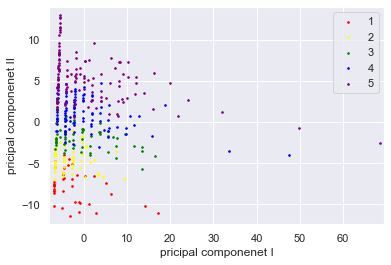

In [35]:
st1 = plt.scatter(all_datas[labels_5 == 1, 0], all_datas[labels_5 == 1, 1], s=2.5, color='red')
st2 = plt.scatter(all_datas[labels_5 == 2, 0], all_datas[labels_5 == 2, 1], s=2.5, color='yellow')
st3 = plt.scatter(all_datas[labels_5 == 3, 0], all_datas[labels_5 == 3, 1], s=2.5, color='green')
st4 = plt.scatter(all_datas[labels_5 == 4, 0], all_datas[labels_5 == 4, 1], s=2.5, color='blue')
st5 = plt.scatter(all_datas[labels_5 == 5, 0], all_datas[labels_5 == 5, 1], s=2.5, color='purple')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('pricipal componenet I')
plt.ylabel('pricipal componenet II')
plt.legend([st1, st2, st3, st4, st5], [1, 2, 3, 4, 5])
plt.show()

In [36]:
# compute knn distance
sample_data = test_datas[0]

distances = {}
for i in range(len(train_datas)):
    distances[i] = sqrt((train_datas[i][0] - sample_data[0])**2 + (train_datas[i][1] - sample_data[1])**2)  # Euclidean distance

distances = sorted(distances.items(), key=lambda x:x[1])         # acquire the knn by sorting the distance 


# knn, k=10
knn_distances = distances[:10]
# print(knn_distances)
vote = { 1:0, 2:0, 3:0, 4:0, 5:0}

print('knn: ')
for i in knn_distances: 
    print('data id:', str(i[0]), ' distance:', str(i[1]), ' true label:', train_labels[i[0]])
    vote[train_labels[i[0]]] += 1

print('')
print('the true label of the sample: ', test_labels[0])
print('the predict label of the sample: ', model.predict(sample_data.reshape(1, -1))[0])
# print('the predict label of the sample: ', vote.index(max(vote))+1)

knn: 
data id: 177  distance: 0.9799032105950941  true label: 2
data id: 124  distance: 0.992488892463784  true label: 4
data id: 211  distance: 1.0301485743674503  true label: 3
data id: 246  distance: 1.0536906460491797  true label: 4
data id: 104  distance: 1.072718507747961  true label: 2
data id: 46  distance: 1.0757166536163343  true label: 4
data id: 221  distance: 1.1198013280702586  true label: 4
data id: 122  distance: 1.214888308553088  true label: 3
data id: 240  distance: 1.220706834214805  true label: 4
data id: 262  distance: 1.22876237519148  true label: 4

the true label of the sample:  4
the predict label of the sample:  4
